In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy import stats
from scipy.stats import norm, skew 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection, metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import files
upladed = files.upload()

Saving Aquifer_Auser.csv to Aquifer_Auser (1).csv


In [ ]:
df=pd.read_csv("Kolkata.csv")
df.dtypes

Date                          object
Rainfall_CoochBehar          float64
Rainfall_Darjeeling          float64
Rainfall_Kolkata             float64
Rainfall_Malda               float64
Rainfall_Bakura              float64
Rainfall_Nadia               float64
Rainfall_North24Parganas     float64
Rainfall_Midnapore           float64
Rainfall_Jalpaiguri          float64
Rainfall_Purulia             float64
Depth_to_Groundwater_LT2     float64
Depth_to_Groundwater_SAL     float64
Depth_to_Groundwater_PAG     float64
Depth_to_Groundwater_CoS     float64
Depth_to_Groundwater_DIEC    float64
Temperature_CoochBihar       float64
Temperature_Kolkata          float64
Temperature_Malda            float64
Temperature_Darjeeling       float64
Volume_POL                   float64
Volume_CC1                   float64
Volume_CC2                   float64
Volume_CSA                   float64
Volume_CSAL                  float64
Hydrometry_Kolkata           float64
Hydrometry_Malda             float64
d

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y', errors='ignore')
df = df.set_index('Date')
df.head(2)

,Rainfall_CoochBehar,Rainfall_Darjeeling,Rainfall_Kolkata,Rainfall_Malda,Rainfall_Bakura,Rainfall_Nadia,Rainfall_North24Parganas,Rainfall_Midnapore,Rainfall_Jalpaiguri,Rainfall_Purulia,...,Temperature_Kolkata,Temperature_Malda,Temperature_Darjeeling,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Kolkata,Hydrometry_Malda
Date,,,,,,,,,,,,,,,,,,,,,
05-03-1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-03-1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def get_percentage_nan_values(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh} missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')

    return plt.show()

def show_distribution_nan_values(df):
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
    sns.heatmap(df.T.isna(), cmap='Blues')
    ax.set_title('Fields with Missing Values', fontsize=16)
    #for tick in ax.xaxis.get_major_ticks():
    #    tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    return plt.show()

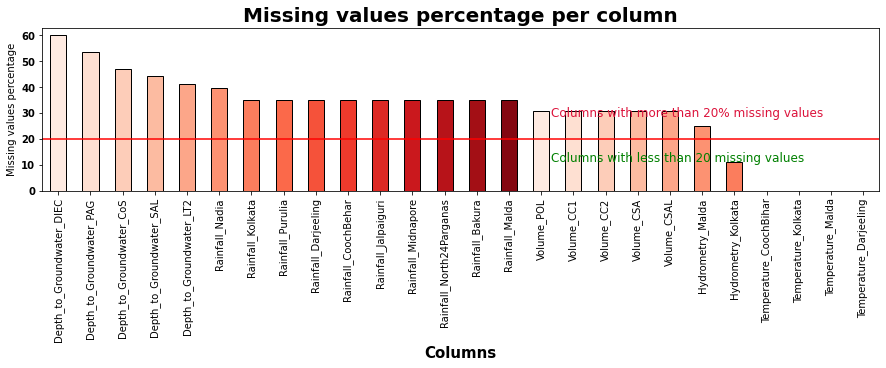

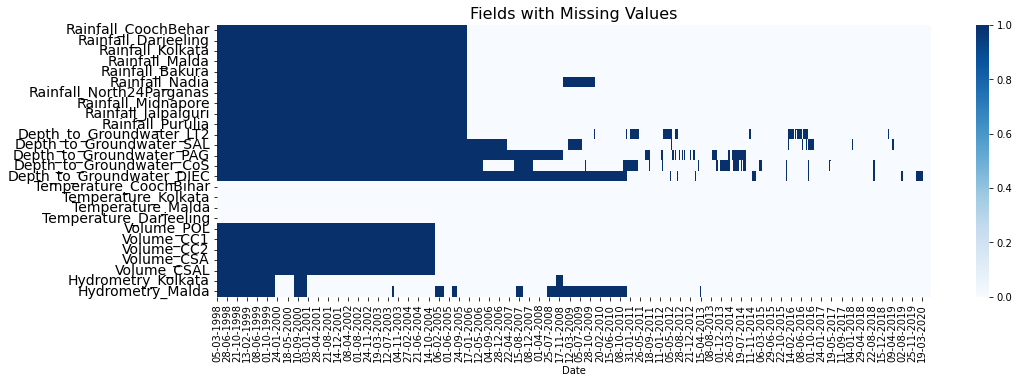

In [ ]:
get_percentage_nan_values(df, 20, color=sns.color_palette('Reds',15))
show_distribution_nan_values(df)

In [ ]:
df.columns

Index(['Rainfall_CoochBehar', 'Rainfall_Darjeeling', 'Rainfall_Kolkata',
       'Rainfall_Malda', 'Rainfall_Bakura', 'Rainfall_Nadia',
       'Rainfall_North24Parganas', 'Rainfall_Midnapore', 'Rainfall_Jalpaiguri',
       'Rainfall_Purulia', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_CoochBihar', 'Temperature_Kolkata', 'Temperature_Malda',
       'Temperature_Darjeeling', 'Volume_POL', 'Volume_CC1', 'Volume_CC2',
       'Volume_CSA', 'Volume_CSAL', 'Hydrometry_Kolkata', 'Hydrometry_Malda'],
      dtype='object')

In [ ]:
WB_rainfall=['Rainfall_CoochBehar', 'Rainfall_Darjeeling', 'Rainfall_Kolkata',
       'Rainfall_Malda', 'Rainfall_Bakura', 'Rainfall_Nadia',
       'Rainfall_North24Parganas', 'Rainfall_Midnapore', 'Rainfall_Jalpaiguri',
       'Rainfall_Purulia']
WB_Groundwater=['Depth_to_Groundwater_LT2','Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG','Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']
WB_Temperature=['Temperature_CoochBihar', 'Temperature_Kolkata', 'Temperature_Malda',
       'Temperature_Darjeeling']
WB_Volume = ['Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL']
WB_hydrometry=['Hydrometry_Kolkata', 'Hydrometry_Malda']

In [ ]:
df['Volume_POL_log10'] = -np.log10(abs(df['Volume_POL']))
df['Volume_CC1_log10'] = -np.log10(abs(df['Volume_CC1']))
df['Volume_CC2_log10'] = -np.log10(abs(df['Volume_CC2']))
df['Volume_CSA_log10'] = -np.log10(abs(df['Volume_CSA']))
df['Volume_CSAL_log10'] = -np.log10(abs(df['Volume_CSAL']))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
def plot_data():
    # Separate columns into smaller dataframes to perform visualisations
    df_rainfall = df[WB_rainfall]
    df_Groundwater = df[WB_Groundwater]
    df_Temperature = df[WB_Temperature]
    df_Volume_log = df[Volume_log]
    df_Volume = df[WB_Volume]
    df_hydrometry = df[WB_hydrometry]

    # plot data
    ax = df_rainfall.plot(figsize=(20, 5), fontsize=12,linewidth=2)
    ax.set_xlabel('Date', fontsize=1)
    ax.set_ylabel('mm', fontsize=16)
    ax.set_title('West Bengal: Rainfall data', fontsize=16)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1 = df_Groundwater.plot(figsize=(20, 5), fontsize=12,linewidth=2)
    ax1.set_xlabel('Date', fontsize=5)
    ax1.set_ylabel('sq cm', fontsize=16)
    ax1.set_title('West Bengal: Underground Catchment Area', fontsize=16)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    ax2 = df_Temperature.plot(figsize=(20,5), fontsize=12,linewidth=2)
    ax2.set_xlabel('Date', fontsize=5)
    ax2.set_ylabel('C', fontsize=16)
    ax2.set_title('West Bengal: Temperature data', fontsize=16)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    ax3 = df_Volume_log.plot(figsize=(20, 5), fontsize=12,linewidth=2,marker='o')
    ax3.set_xlabel('Date', fontsize=5)
    ax3.set_ylabel('mm', fontsize=16)
    ax3.set_title('West Bengal: Prediction of the Volume of Rainwater Harvested', fontsize=16)
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    ax4 = df_hydrometry.plot(figsize=(20, 5), fontsize=12,linewidth=2)
    ax4.set_xlabel('Date', fontsize=5)
    ax4.set_ylabel('', fontsize=16)
    ax4.set_title('West Bengal: Monthly hydrometry', fontsize=16)
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

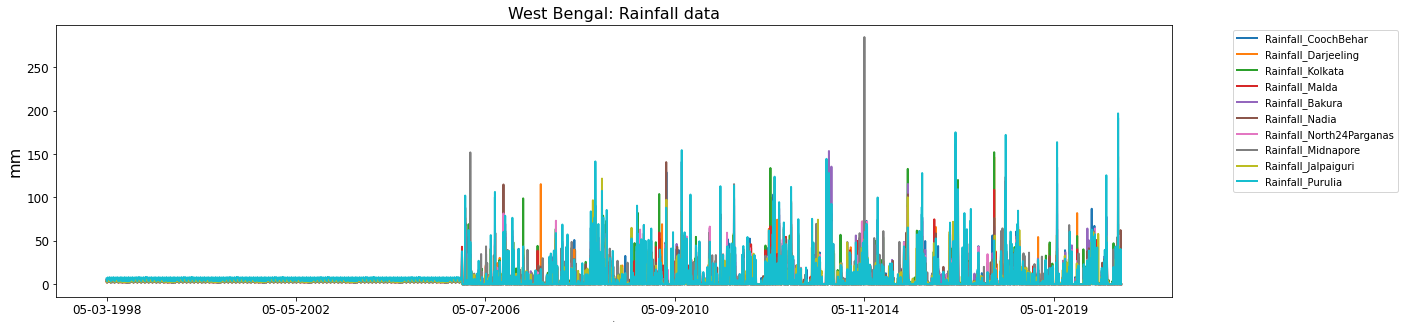

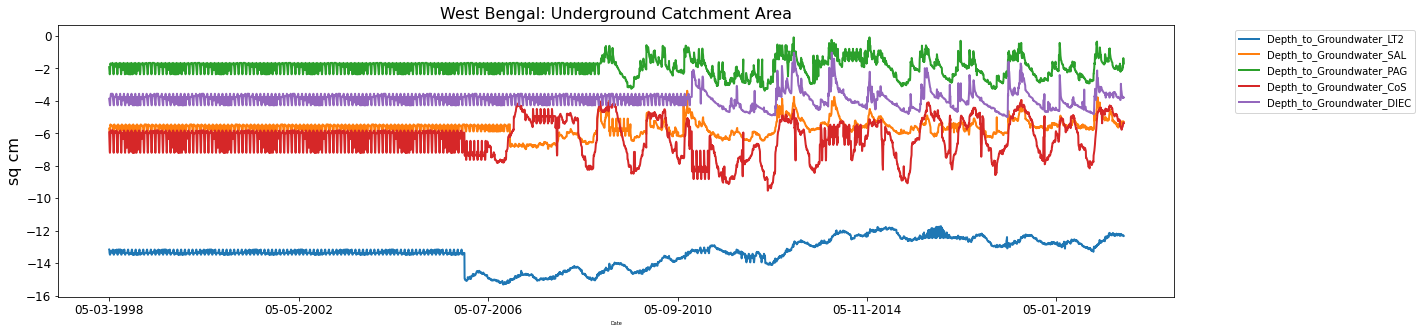

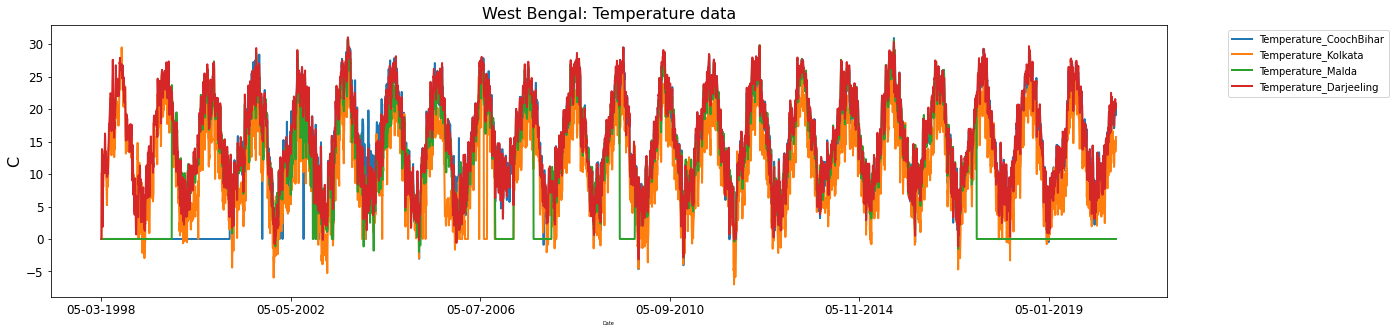

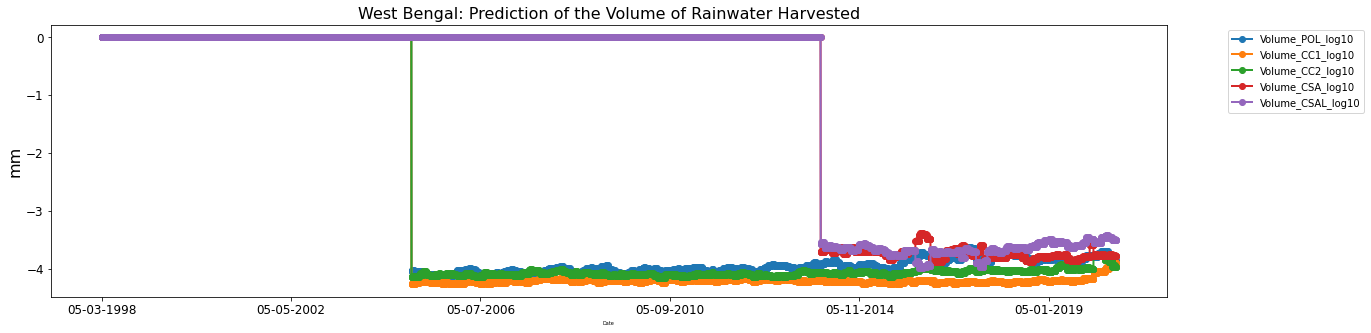

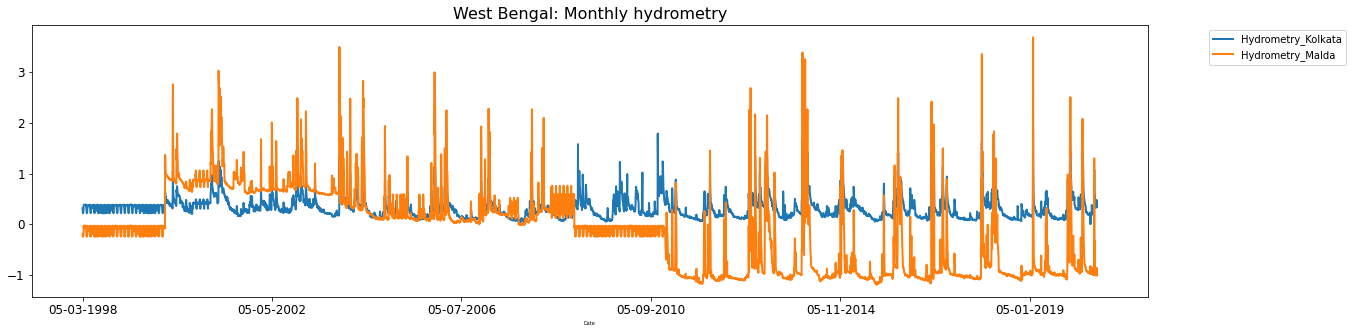

In [ ]:
plot_data()

In [ ]:
Volume_log = ['Volume_POL_log10', 'Volume_CC1_log10', 'Volume_CC2_log10', 'Volume_CSA_log10', 'Volume_CSAL_log10']
df[Volume_log] = df[Volume_log].replace([np.inf, -np.inf], np.nan).fillna(0)

In [ ]:
print(df['Depth_to_Groundwater_LT2'].sort_values(ascending=False).head(5))
print(df['Depth_to_Groundwater_CoS'].sort_values(ascending=False).head(5))
print(df['Depth_to_Groundwater_SAL'].sort_values(ascending=False).head(6))

Date
15-06-2016   -11.72
08-06-2016   -11.75
11-05-2016   -11.76
01-06-2016   -11.76
01-02-2015   -11.77
Name: Depth_to_Groundwater_LT2, dtype: float64
Date
20-03-2018   -3.95
19-03-2018   -3.96
17-12-2008   -4.04
18-03-2018   -4.05
17-03-2018   -4.07
Name: Depth_to_Groundwater_CoS, dtype: float64
Date
16-11-2010   -3.38
19-03-2013   -3.75
12-02-2014   -3.75
02-12-2019   -3.78
20-03-2013   -3.78
11-02-2014   -3.79
Name: Depth_to_Groundwater_SAL, dtype: float64


In [ ]:
df['Depth_to_Groundwater_LT2'] = df['Depth_to_Groundwater_LT2'].replace(to_replace=0, method='ffill')
df['Depth_to_Groundwater_CoS'] = df['Depth_to_Groundwater_CoS'].replace(to_replace=0.00, method='ffill')
df['Depth_to_Groundwater_SAL'] = df['Depth_to_Groundwater_SAL'].replace(to_replace=0, method='ffill')
df['Depth_to_Groundwater_DIEC'] = df['Depth_to_Groundwater_DIEC'].replace(to_replace=0, method='ffill')

In [ ]:
df['Month'] = pd.DatetimeIndex(df.index).month
df['Year'] = pd.DatetimeIndex(df.index).year
df.fillna(df.groupby(['Month','Year']).transform('mean'), inplace=True)
df.fillna(df.groupby(['Month']).transform('mean'), inplace=True)

In [ ]:
df_csal = df.loc[df['Volume_CSAL_log10']!=0]
value_to_remove = df_csal['Volume_CSAL_log10'].max()
df['Volume_CSAL_log10'] = df['Volume_CSAL_log10'].replace(to_replace=value_to_remove, method='ffill')
df_csal = df.loc[df['Volume_CSAL_log10']!=0]
value_to_remove = df_csal['Volume_CSAL_log10'].max()
df['Volume_CSAL_log10'] = df['Volume_CSAL_log10'].replace(to_replace=value_to_remove, method='ffill')

In [ ]:
df = df[df.index <='2020-01-01']

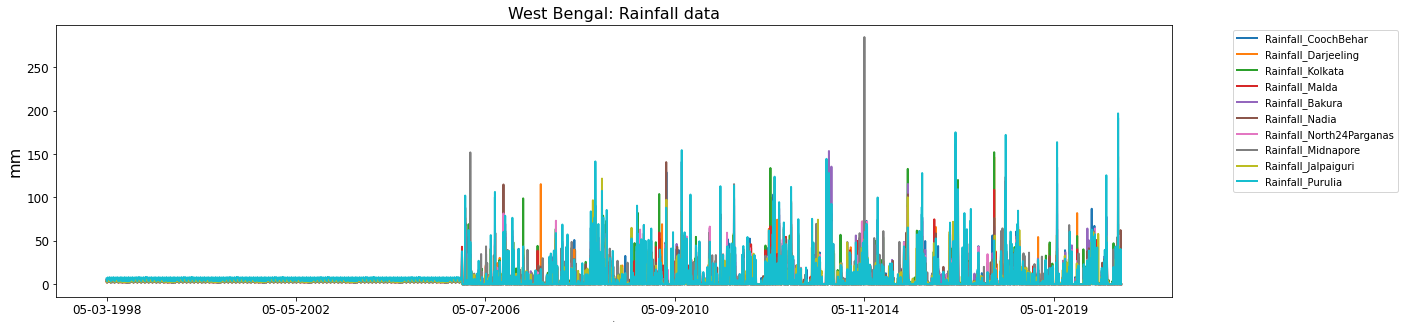

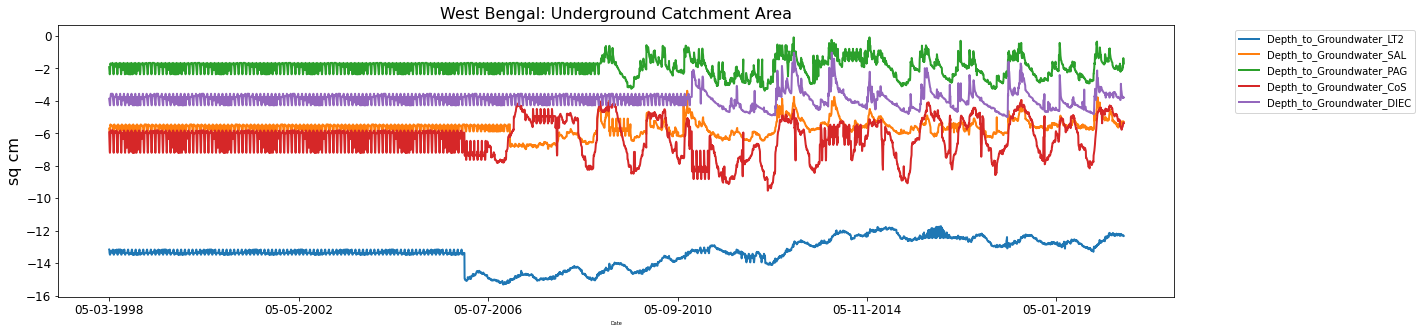

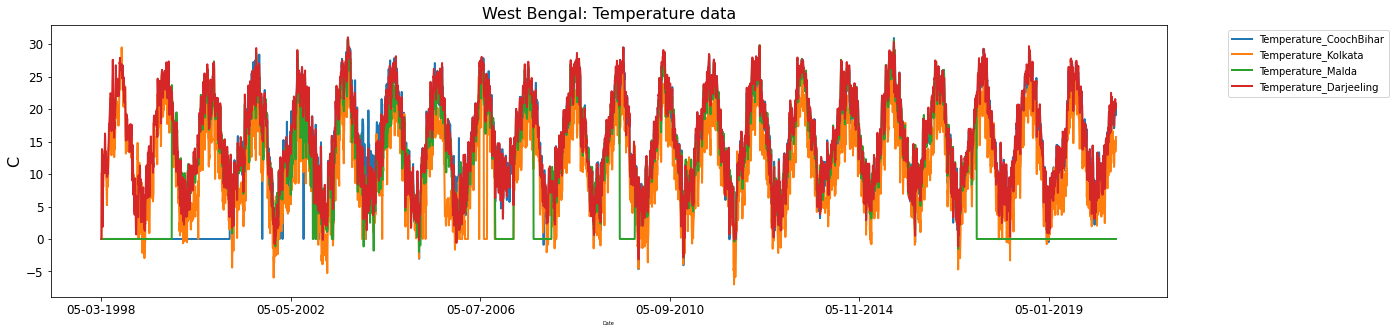

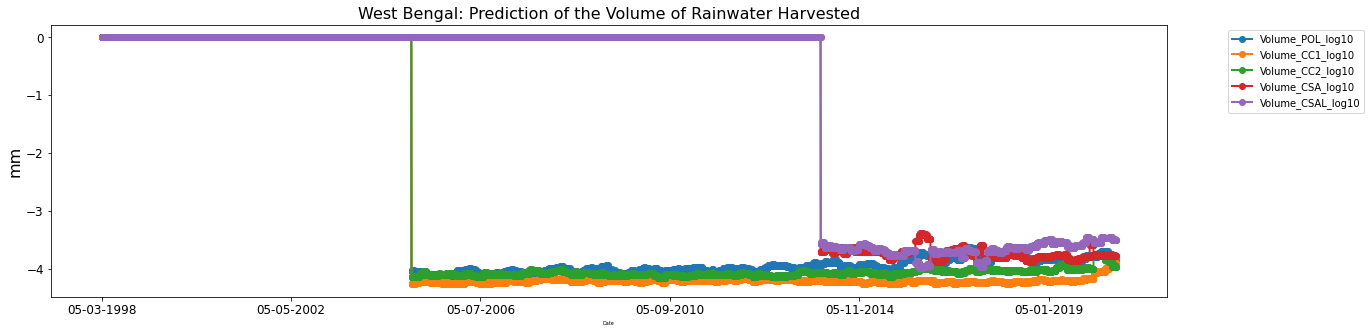

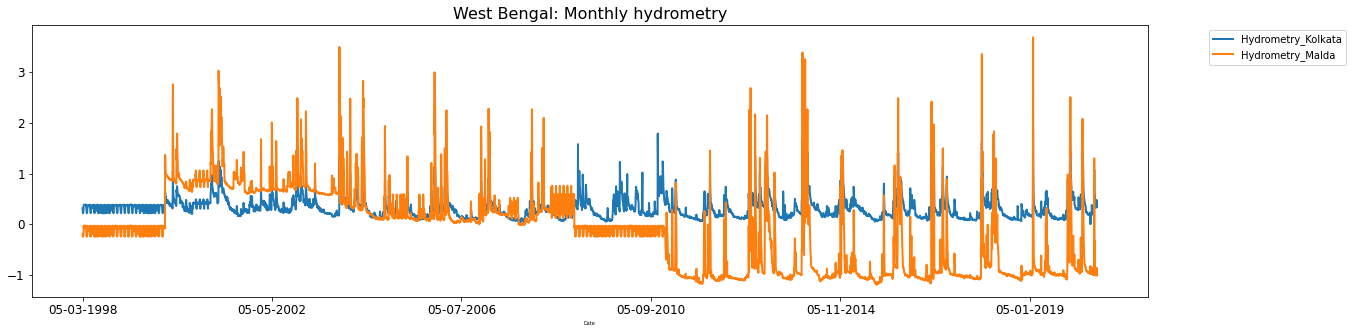

In [ ]:
plot_data()